In [1]:
#Libraries used
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#Load databases from https://mrv.emsa.europa.eu/#public/emission-report

data18=pd.read_excel("2018-v258-30062021-EU MRV Publication of information.xlsx",index_col=0,skiprows=2)
data19=pd.read_excel("2019-v189-10082021-EU MRV Publication of information.xlsx",index_col=0,skiprows=2)
data20=pd.read_excel("2020-v25-01082021-EU MRV Publication of information.xlsx",index_col=0,skiprows=2)
data20=data20.rename(columns={"Time spent at sea [hours]": "Total time spent at sea [hours]", "Annual Time spent at sea [hours]": "Annual Total time spent at sea [hours]"})

In [3]:
#Combine databases

data=pd.concat([data18,data19,data20])
data20["Name"].count()

11332

In [4]:
#Removing ships that didn't travel
data18['Annual average Fuel consumption per distance [kg / n mile]'] = pd.to_numeric(data18['Annual average Fuel consumption per distance [kg / n mile]'], errors='coerce')
data18=data18.dropna(subset=["Annual average Fuel consumption per distance [kg / n mile]"])
data19['Annual average Fuel consumption per distance [kg / n mile]'] = pd.to_numeric(data19['Annual average Fuel consumption per distance [kg / n mile]'], errors='coerce')
data19=data19.dropna(subset=["Annual average Fuel consumption per distance [kg / n mile]"])
data20['Annual average Fuel consumption per distance [kg / n mile]'] = pd.to_numeric(data20['Annual average Fuel consumption per distance [kg / n mile]'], errors='coerce')
data20=data20.dropna(subset=["Annual average Fuel consumption per distance [kg / n mile]"])
data20["Name"].count()

10955

In [5]:
# Get general descriptive statistics of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35921 entries, 5383304 to 9910088
Data columns (total 61 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Name                                                                                                                     35921 non-null  object 
 1   Ship type                                                                                                                35921 non-null  object 
 2   Reporting Period                                                                                                         35921 non-null  int64  
 3   Technical efficiency                                                                                                     34225 n

In [6]:
data.describe()

,Reporting Period,Total fuel consumption [m tonnes],Fuel consumptions assigned to On laden [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes],CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes],CO₂ emissions assigned to Passenger transport [m tonnes],CO₂ emissions assigned to Freight transport [m tonnes],CO₂ emissions assigned to On laden [m tonnes],Annual Total time spent at sea [hours],Through ice [n miles],Total time spent at sea [hours],Total time spent at sea through ice [hours],Fuel consumption per transport work (pax) on laden voyages [g / pax · n miles],Fuel consumption per transport work (freight) on laden voyages [g / m tonnes · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Average density of the cargo transported [m tonnes / m³]
count,35921.000000,35921.000000,3897.000000,35921.000000,3.592100e+04,35921.000000,35921.000000,3.592100e+04,1111.000000,1093.000000,3900.000000,3.592100e+04,1865.000000,3.592100e+04,1865.000000,11.000000,0.0,11.000000,0.0,5.00000
mean,2018.974917,3694.846597,3463.110493,11534.224968,3.659327e+03,3438.375350,3793.139409,7.650961e+02,18575.419856,21431.476853,10808.814903,1.930222e+04,25.242831,1.930222e+04,2.762525,123.646364,NaN,389.910909,NaN,0.35000
std,0.809575,4676.021407,4836.007654,14490.329004,1.284693e+04,5165.253134,5888.749791,6.798611e+03,19376.673809,19989.638093,15057.571148,3.183686e+06,399.068428,3.183686e+06,42.042835,17.171287,NaN,55.464263,NaN,0.47927
min,2018.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,92.540000,NaN,288.380000,NaN,0.00000
25%,2018.000000,1066.700000,778.850000,3347.330000,0.000000e+00,679.130000,832.040000,1.231100e+02,4429.240000,6704.780000,2436.557500,1.041930e+03,0.000000,1.041930e+03,0.000000,114.630000,NaN,360.910000,NaN,0.00000
50%,2019.000000,2115.020000,1554.000000,6638.160000,6.078000e+02,1858.540000,2124.090000,3.223100e+02,11703.310000,16327.620000,4872.860000,2.066000e+03,0.000000,2.066000e+03,0.000000,130.570000,NaN,412.090000,NaN,0.00000
75%,2020.000000,4230.670000,3471.700000,13279.890000,2.720330e+03,3892.060000,4287.770000,8.572800e+02,26272.200000,30981.390000,10830.882500,3.738000e+03,0.000000,3.738000e+03,0.000000,134.225000,NaN,421.625000,NaN,0.87000
max,2020.000000,98465.200000,44715.460000,315478.510000,1.672576e+06,170643.000000,359534.000000,1.260629e+06,105415.090000,127026.560000,139545.350000,6.034010e+08,11103.300000,6.034010e+08,1166.350000,143.880000,NaN,456.030000,NaN,0.88000


In [7]:
data18.describe()

,Reporting Period,D,Total fuel consumption [m tonnes],Fuel consumptions assigned to On laden [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes],CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes],CO₂ emissions assigned to Passenger transport [m tonnes],...,Annual Total time spent at sea [hours],Annual average Fuel consumption per distance [kg / n mile],Through ice [n miles],Total time spent at sea [hours],Total time spent at sea through ice [hours],Fuel consumption per transport work (pax) on laden voyages [g / pax · n miles],Fuel consumption per transport work (freight) on laden voyages [g / m tonnes · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Average density of the cargo transported [m tonnes / m³]
count,11593.0,0.0,11593.000000,1290.000000,11593.000000,11593.000000,11593.000000,11593.000000,11593.000000,370.000000,...,11593.000000,11593.000000,571.000000,11593.000000,571.000000,11.000000,0.0,11.000000,0.0,5.00000
mean,2018.0,NaN,4005.907437,3473.586907,12512.851487,4036.841103,3657.562653,4094.980706,771.073264,23529.673730,...,2752.353534,136.998410,20.457443,2752.353534,1.986673,123.646364,NaN,389.910909,NaN,0.35000
std,0.0,NaN,5040.849865,5153.210674,15677.198702,10424.874854,5371.601353,6628.230026,1438.253515,21132.285132,...,3169.823964,1170.523957,165.489573,3169.823964,16.548862,17.171287,NaN,55.464263,NaN,0.47927
min,2018.0,NaN,8.500000,2.200000,26.710000,0.000000,0.000000,0.000000,0.000000,20.540000,...,0.000000,7.690000,0.000000,0.000000,0.000000,92.540000,NaN,288.380000,NaN,0.00000
25%,2018.0,NaN,1197.780000,769.425000,3753.010000,58.420000,828.590000,1009.430000,141.010000,6336.760000,...,1194.200000,79.710000,0.000000,1194.200000,0.000000,114.630000,NaN,360.910000,NaN,0.00000
50%,2018.0,NaN,2264.410000,1529.275000,7092.660000,722.310000,1971.070000,2310.630000,342.400000,17933.455000,...,2267.400000,101.850000,0.000000,2267.400000,0.000000,130.570000,NaN,412.090000,NaN,0.00000
75%,2018.0,NaN,4493.160000,3207.225000,14117.490000,3103.350000,4069.000000,4581.400000,885.060000,36361.090000,...,4047.000000,145.700000,0.000000,4047.000000,0.000000,134.225000,NaN,421.625000,NaN,0.87000
max,2018.0,NaN,98465.200000,43765.000000,315478.510000,309112.290000,66262.400000,359534.000000,59798.520000,104615.670000,...,276023.000000,125655.790000,2339.000000,276023.000000,248.500000,143.880000,NaN,456.030000,NaN,0.88000


In [8]:
data19.describe()

,Reporting Period,Total fuel consumption [m tonnes],Fuel consumptions assigned to On laden [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes],CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes],CO₂ emissions assigned to Passenger transport [m tonnes],CO₂ emissions assigned to Freight transport [m tonnes],...,Through ice [n miles],Total time spent at sea [hours],Total time spent at sea through ice [hours],Fuel consumption per transport work (volume) on laden voyages [g / m³ · n miles],Fuel consumption per transport work (pax) on laden voyages [g / pax · n miles],Fuel consumption per transport work (freight) on laden voyages [g / m tonnes · n miles],CO₂ emissions per transport work (volume) on laden voyages [g CO₂ / m³ · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Average density of the cargo transported [m tonnes / m³]
count,12017.0,12017.000000,1430.000000,12017.000000,1.201700e+04,12017.000000,12017.000000,1.201700e+04,392.000000,390.000000,...,651.000000,1.201700e+04,651.000000,57.000000,0.0,0.0,57.000000,0.0,0.0,0.0
mean,2019.0,3912.112850,3644.813035,12211.943345,4.037157e+03,3590.742596,3969.477441,8.862513e+02,18056.044923,21748.338744,...,6.665315,5.293037e+04,1.287296,2.194386,NaN,NaN,6.404561,NaN,NaN,NaN
std,0.0,4720.150791,4857.605437,14616.940198,1.794076e+04,5053.820364,5846.872099,1.159932e+04,18428.677317,19703.607580,...,63.025443,5.504351e+06,18.249370,1.317792,NaN,NaN,3.786409,NaN,NaN,NaN
min,2019.0,13.100000,0.000000,41.300000,0.000000e+00,0.000000,0.000000,0.000000e+00,7.580000,0.000000,...,0.000000,1.000000e+00,0.000000,0.270000,NaN,NaN,0.860000,NaN,NaN,NaN
25%,2019.0,1200.760000,800.442500,3769.110000,7.612000e+01,866.090000,1016.320000,1.452300e+02,4883.620000,7155.382500,...,0.000000,1.209000e+03,0.000000,1.560000,NaN,NaN,4.730000,NaN,NaN,NaN
50%,2019.0,2266.590000,1642.780000,7123.530000,7.050100e+02,1999.470000,2280.200000,3.567500e+02,11621.055000,16825.460000,...,0.000000,2.285300e+03,0.000000,1.890000,NaN,NaN,5.610000,NaN,NaN,NaN
75%,2019.0,4461.990000,3958.650000,14016.690000,2.953240e+03,4088.000000,4529.570000,9.153800e+02,25231.445000,32345.672500,...,0.000000,4.006000e+03,0.000000,2.270000,NaN,NaN,6.390000,NaN,NaN,NaN
max,2019.0,48449.600000,29809.700000,151825.280000,1.672576e+06,64749.100000,219236.000000,1.260629e+06,105415.090000,105113.320000,...,1269.350000,6.034010e+08,440.690000,9.600000,NaN,NaN,26.580000,NaN,NaN,NaN


In [9]:
data20.describe()

,Reporting Period,Total fuel consumption [m tonnes],Fuel consumptions assigned to On laden [m tonnes],Total CO₂ emissions [m tonnes],CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes],CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes],CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes],CO₂ emissions assigned to Passenger transport [m tonnes],CO₂ emissions assigned to Freight transport [m tonnes],...,Through ice [n miles],Total time spent at sea [hours],Total time spent at sea through ice [hours],Fuel consumption per transport work (volume) on laden voyages [g / m³ · n miles],Fuel consumption per transport work (pax) on laden voyages [g / pax · n miles],Fuel consumption per transport work (freight) on laden voyages [g / m tonnes · n miles],CO₂ emissions per transport work (volume) on laden voyages [g CO₂ / m³ · n miles],CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],Average density of the cargo transported [m tonnes / m³]
count,10955.0,10955.000000,1173.000000,10955.000000,10955.000000,10955.000000,10955.000000,10955.000000,347.000000,347.000000,...,643.000000,10955.000000,643.000000,39.000000,0.0,0.0,39.000000,0.0,0.0,0.0
mean,2020.0,3583.276503,3241.885627,11178.479587,3298.317197,3464.883918,3749.798171,718.197650,13986.578012,18568.981470,...,48.301026,2316.200709,4.945086,2.137692,NaN,NaN,6.026667,NaN,NaN,NaN
std,0.0,4303.081781,4431.272865,13266.058032,8427.677878,5234.036966,5273.222526,1292.849501,17169.317932,18145.648959,...,658.139105,1565.942105,67.411003,1.339755,NaN,NaN,3.671769,NaN,NaN,NaN
min,2020.0,6.030000,0.000000,19.080000,0.000000,0.000000,0.000000,0.000000,1.060000,0.000000,...,0.000000,13.000000,0.000000,1.010000,NaN,NaN,2.780000,NaN,NaN,NaN
25%,2020.0,1110.650000,764.300000,3500.455000,34.920000,795.330000,943.020000,134.305000,2582.390000,6058.055000,...,0.000000,1024.750000,0.000000,1.510000,NaN,NaN,4.220000,NaN,NaN,NaN
50%,2020.0,2100.800000,1477.630000,6611.760000,627.670000,1896.100000,2101.480000,333.810000,7096.210000,14159.400000,...,0.000000,1928.840000,0.000000,1.740000,NaN,NaN,5.210000,NaN,NaN,NaN
75%,2020.0,4132.330000,3395.500000,12932.590000,2677.525000,3880.955000,4164.255000,878.000000,19367.100000,24074.255000,...,0.000000,3374.285000,0.000000,2.240000,NaN,NaN,6.185000,NaN,NaN,NaN
max,2020.0,48499.500000,44715.460000,151141.170000,297987.710000,170643.000000,60445.370000,41980.920000,100273.070000,102757.560000,...,11103.300000,8603.500000,1166.350000,8.920000,NaN,NaN,24.630000,NaN,NaN,NaN


<AxesSubplot:xlabel='Ship type', ylabel='Count'>

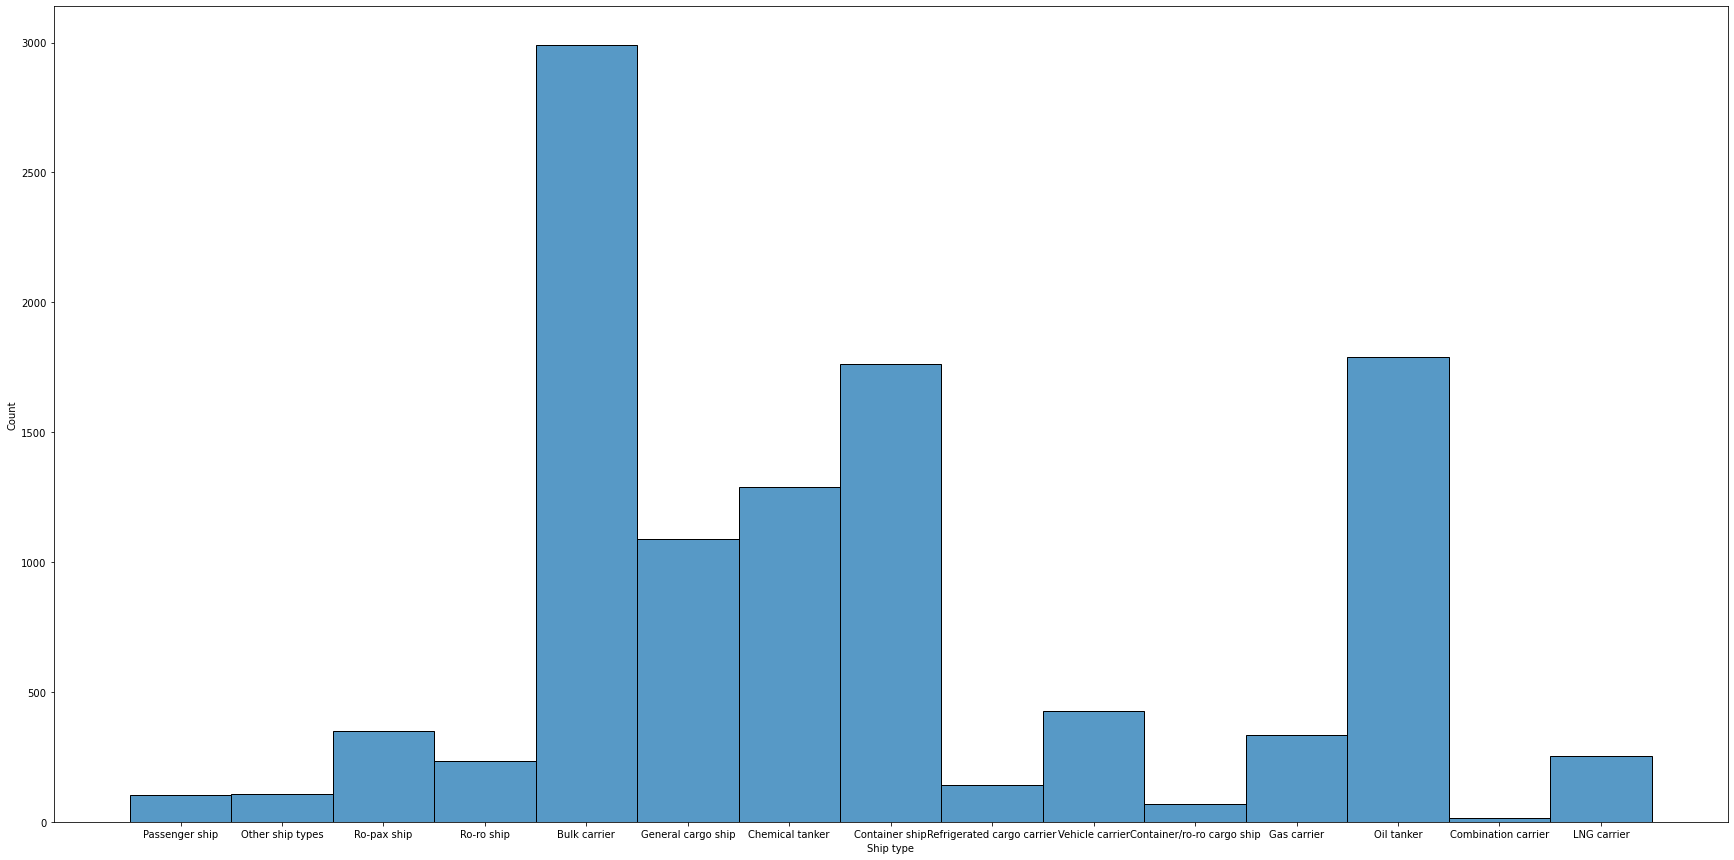

In [10]:
#Types of ships doing journeys within the EU

dims = (30, 15)
fig, ax = plt.subplots(figsize=dims)
sb.histplot(data20, x="Ship type")

In [11]:
data.groupby('Reporting Period')['Ship type'].value_counts()

Reporting Period  Ship type                 
2018              Bulk carrier                  3834
                  Oil tanker                    1906
                  Container ship                1806
                  Chemical tanker               1364
                  General cargo ship            1174
                  Vehicle carrier                448
                  Ro-pax ship                    376
                  Gas carrier                    321
                  Ro-ro ship                     272
                  LNG carrier                    213
                  Passenger ship                 159
                  Refrigerated cargo carrier     145
                  Other ship types               126
                  Container/ro-ro cargo ship      79
                  Combination carrier             10
2019              Bulk carrier                  3648
                  Oil tanker                    2007
                  Container ship                1845
 

In [12]:
data20['Ship type'].value_counts(normalize=True)

Bulk carrier                  0.272935
Oil tanker                    0.163487
Container ship                0.161022
Chemical tanker               0.117754
General cargo ship            0.099224
Vehicle carrier               0.038978
Ro-pax ship                   0.031766
Gas carrier                   0.030488
LNG carrier                   0.023003
Ro-ro ship                    0.021269
Refrigerated cargo carrier    0.012962
Other ship types              0.009859
Passenger ship                0.009493
Container/ro-ro cargo ship    0.006390
Combination carrier           0.001369
Name: Ship type, dtype: float64

In [13]:
#Co2 emissions from each type of ship
ShipTypeCO2emissions=data20.groupby('Ship type')['Total CO₂ emissions [m tonnes]'].sum()
ShipTypeCO2emissions=pd.DataFrame(ShipTypeCO2emissions)
ShipTypeCO2emissions=ShipTypeCO2emissions.reset_index()
ShipTypeCO2emissions=ShipTypeCO2emissions.sort_values(by='Total CO₂ emissions [m tonnes]', ascending=False)
ShipTypeCO2emissions

,Ship type,Total CO₂ emissions [m tonnes]
3,Container ship,40827642.09
8,Oil tanker,17643805.75
0,Bulk carrier,13832594.26
12,Ro-pax ship,11306118.18
1,Chemical tanker,8906636.81
7,LNG carrier,7720740.16
6,General cargo ship,5568385.19
13,Ro-ro ship,5124903.41
14,Vehicle carrier,3994725.03
5,Gas carrier,2540358.04


<AxesSubplot:xlabel='Ship type', ylabel='Total CO₂ emissions [m tonnes]'>

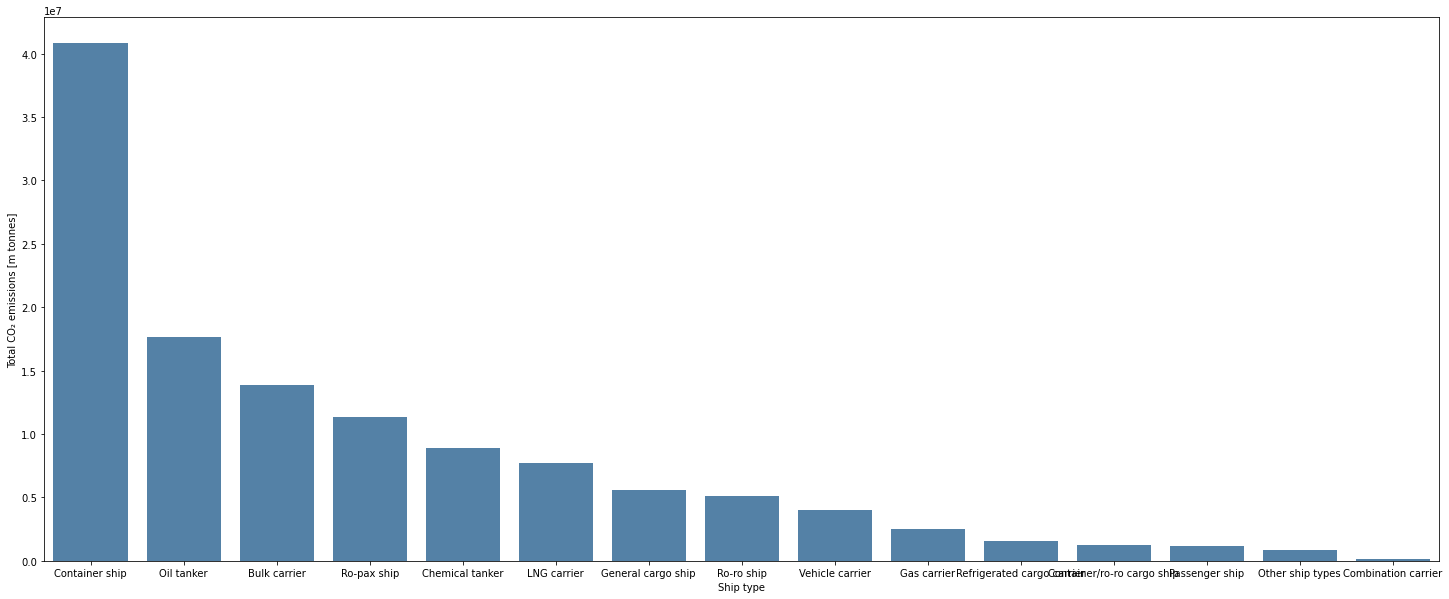

In [14]:
dims = (25, 10)
fig, ax = plt.subplots(figsize=dims)
sb.barplot(x="Ship type", y="Total CO₂ emissions [m tonnes]", data=ShipTypeCO2emissions,color='steelblue')

In [15]:
#Mean amount of CO2 produced by each ship
ShipTypeMeanCO2emissions=data20.groupby('Ship type')['Total CO₂ emissions [m tonnes]'].mean()
ShipTypeMeanCO2emissions=pd.DataFrame(ShipTypeMeanCO2emissions)
ShipTypeMeanCO2emissions=ShipTypeMeanCO2emissions.reset_index()
ShipTypeMeanCO2emissions=ShipTypeMeanCO2emissions.sort_values(by='Total CO₂ emissions [m tonnes]', ascending=False)
ShipTypeMeanCO2emissions=ShipTypeMeanCO2emissions.rename(columns={'Total CO₂ emissions [m tonnes]':'Mean CO₂ emissions [m tonnes]'})
ShipTypeMeanCO2emissions

,Ship type,Mean CO₂ emissions [m tonnes]
12,Ro-pax ship,32488.845345
7,LNG carrier,30637.857778
3,Container ship,23144.921820
13,Ro-ro ship,21995.293605
4,Container/ro-ro cargo ship,18099.350286
10,Passenger ship,11459.250577
11,Refrigerated cargo carrier,11225.399577
8,Oil tanker,9851.371161
14,Vehicle carrier,9355.327939
9,Other ship types,7656.682130


<AxesSubplot:xlabel='Ship type', ylabel='Mean CO₂ emissions [m tonnes]'>

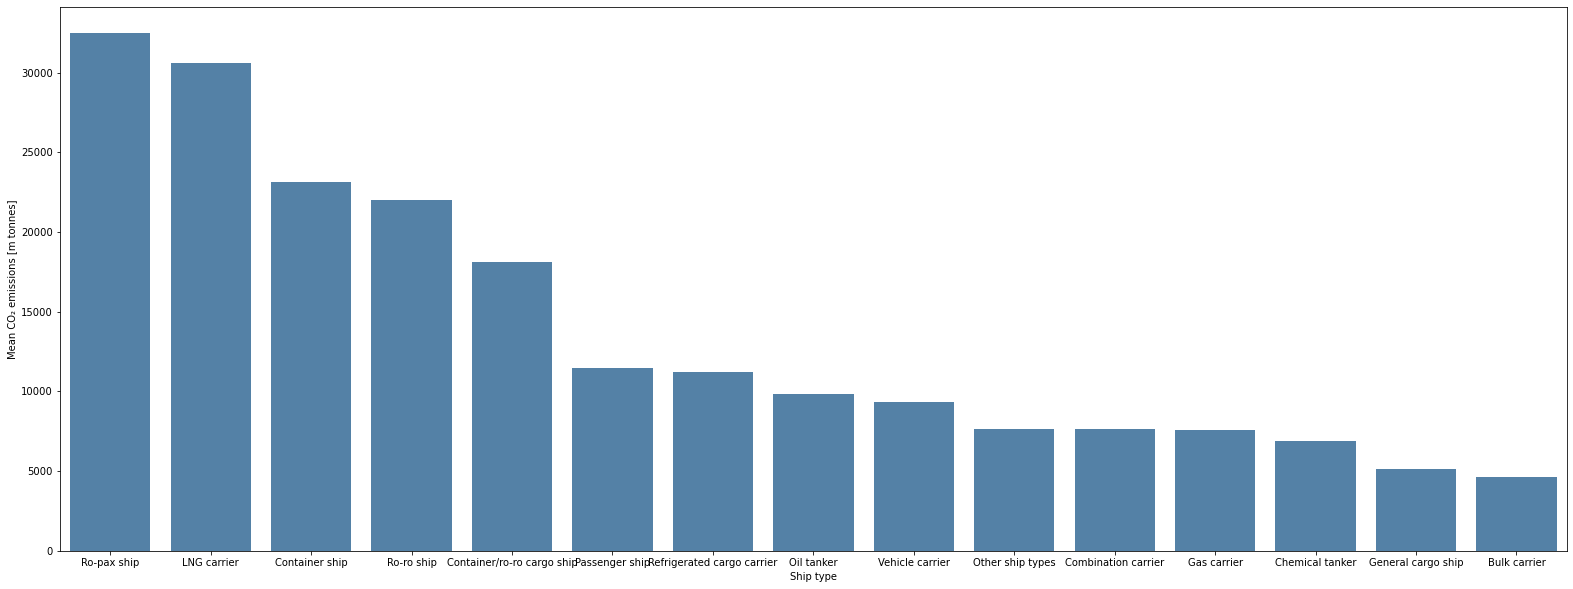

In [16]:
dims = (27, 10)
fig, ax = plt.subplots(figsize=dims)
sb.barplot(x="Ship type", y="Mean CO₂ emissions [m tonnes]", data=ShipTypeMeanCO2emissions,color='steelblue')

In [17]:
data20.groupby('Ship type')['Total CO₂ emissions [m tonnes]'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship type,,,,,,,,
Bulk carrier,2990.0,4626.285706,3145.387316,64.62,2392.0175,3934.230,6113.7575,42326.17
Chemical tanker,1290.0,6904.369620,3909.770396,55.62,3922.8275,6565.945,9422.8275,22333.00
Combination carrier,15.0,7645.998000,5942.799104,910.37,3720.9750,6890.210,10129.9350,24890.21
Container ship,1764.0,23144.921820,18672.498246,110.70,9175.4625,17001.735,34182.7575,139545.35
Container/ro-ro cargo ship,70.0,18099.350286,10703.010451,831.43,9969.5200,17521.645,26574.1075,41113.30
Gas carrier,334.0,7605.862395,5874.601124,233.88,3397.8650,5843.880,10026.4625,32837.88
General cargo ship,1087.0,5122.709466,3593.065619,19.08,2446.8350,4672.670,6599.9550,22753.17
LNG carrier,252.0,30637.857778,21558.162909,2473.66,12919.3625,24704.710,44578.9975,91339.45
Oil tanker,1791.0,9851.371161,6710.577946,84.61,4536.9250,8664.110,13489.3300,47000.76


In [18]:
#Amount of fuel used by ship
ShipTypeTotalFuel=data20.groupby('Ship type')['Total fuel consumption [m tonnes]'].sum()
ShipTypeTotalFuel=pd.DataFrame(ShipTypeTotalFuel)
ShipTypeTotalFuel=ShipTypeTotalFuel.reset_index()
ShipTypeTotalFuel=ShipTypeTotalFuel.sort_values(by='Total fuel consumption [m tonnes]', ascending=False)
ShipTypeTotalFuel

,Ship type,Total fuel consumption [m tonnes]
3,Container ship,13033647.66
8,Oil tanker,5602578.79
0,Bulk carrier,4393892.59
12,Ro-pax ship,3615267.71
1,Chemical tanker,2824240.23
7,LNG carrier,2697167.34
6,General cargo ship,1764090.41
13,Ro-ro ship,1634686.76
14,Vehicle carrier,1274048.46
5,Gas carrier,820543.47


<AxesSubplot:xlabel='Ship type', ylabel='Total fuel consumption [m tonnes]'>

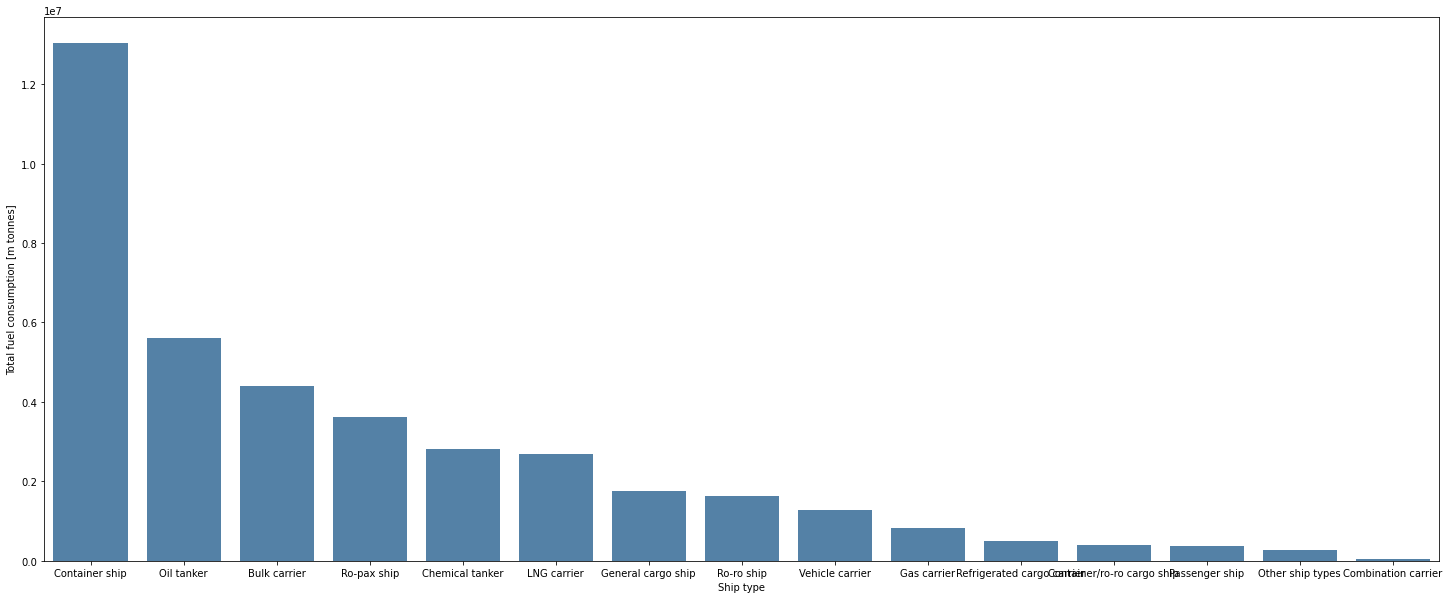

In [19]:
dims = (25, 10)
fig, ax = plt.subplots(figsize=dims)
sb.barplot(x="Ship type", y="Total fuel consumption [m tonnes]", data=ShipTypeTotalFuel,color='steelblue')

In [20]:
#Mean amount of fuel produced by each ship
ShipTypeMeanFuel=data20.groupby('Ship type')['Total fuel consumption [m tonnes]'].mean()
ShipTypeMeanFuel=pd.DataFrame(ShipTypeMeanFuel)
ShipTypeMeanFuel=ShipTypeMeanFuel.reset_index()
ShipTypeMeanFuel=ShipTypeMeanFuel.sort_values(by='Total fuel consumption [m tonnes]', ascending=False)
ShipTypeMeanFuel=ShipTypeMeanFuel.rename(columns={'Total fuel consumption [m tonnes]':'Mean Fuel consumption [m tonnes]'})
ShipTypeMeanFuel

,Ship type,Mean Fuel consumption [m tonnes]
7,LNG carrier,10703.045000
12,Ro-pax ship,10388.700316
3,Container ship,7388.689150
13,Ro-ro ship,7015.823004
4,Container/ro-ro cargo ship,5781.632143
10,Passenger ship,3638.830288
11,Refrigerated cargo carrier,3585.309155
8,Oil tanker,3128.184696
14,Vehicle carrier,2983.720047
9,Other ship types,2462.660093


<AxesSubplot:xlabel='Ship type', ylabel='Mean Fuel consumption [m tonnes]'>

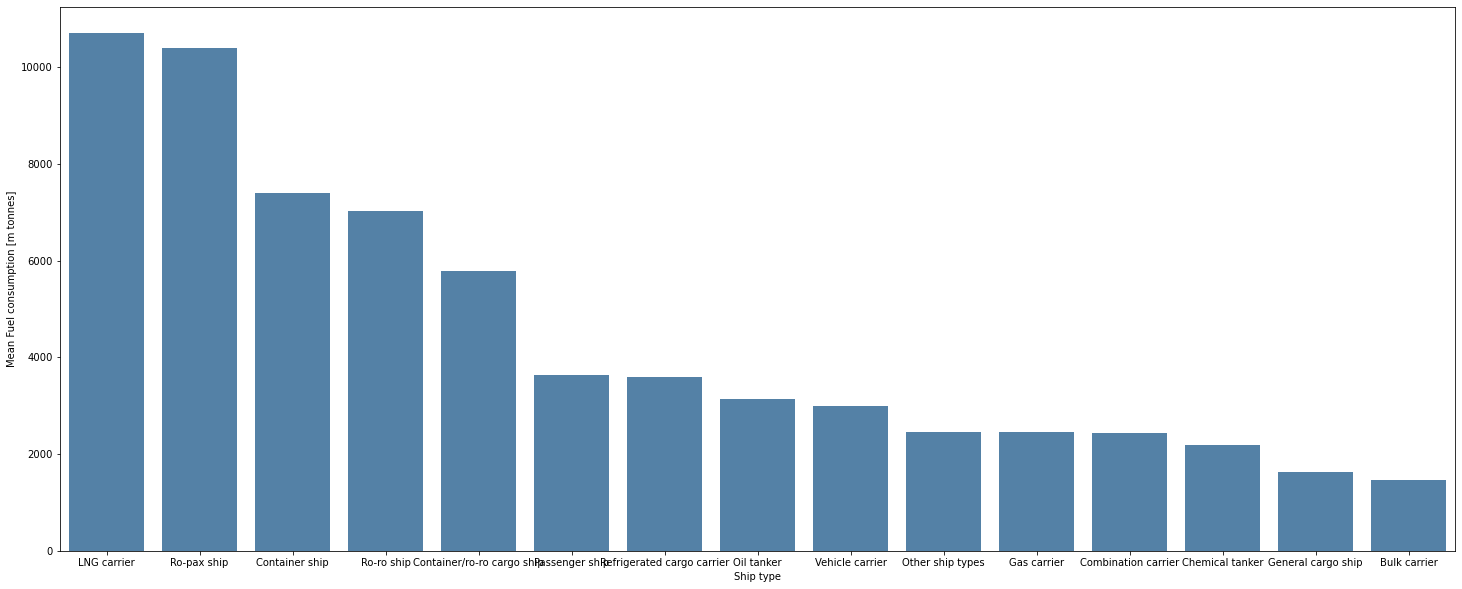

In [21]:
dims = (25, 10)
fig, ax = plt.subplots(figsize=dims)
sb.barplot(x="Ship type", y="Mean Fuel consumption [m tonnes]", data=ShipTypeMeanFuel,color='steelblue')

In [22]:
data20.groupby('Ship type')['Total fuel consumption [m tonnes]'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship type,,,,,,,,
Bulk carrier,2990.0,1469.529294,998.755799,20.50,760.5950,1252.990,1944.1750,13410.88
Chemical tanker,1290.0,2189.333512,1237.057185,17.35,1248.2500,2078.715,2980.6275,7094.64
Combination carrier,15.0,2426.458667,1904.035097,291.20,1181.6150,2149.160,3174.9500,7991.97
Container ship,1764.0,7388.689150,5978.031052,35.50,2913.1550,5388.115,10908.5050,44715.46
Container/ro-ro cargo ship,70.0,5781.632143,3423.664680,262.42,3201.2500,5575.670,8465.0800,13176.40
Gas carrier,334.0,2456.716976,1976.115542,74.15,1081.5900,1838.855,3193.8400,11701.00
General cargo ship,1087.0,1622.898261,1144.656376,6.03,779.0750,1469.650,2081.2450,7297.02
LNG carrier,252.0,10703.045000,7525.413679,895.60,4485.7775,8739.165,14851.3250,31751.27
Oil tanker,1791.0,3128.184696,2130.362546,26.90,1443.9500,2743.720,4261.2950,15013.94


In [23]:
#Main Ship type database
ShipType=pd.merge(ShipTypeTotalFuel,ShipTypeMeanFuel,on="Ship type")
ShipType=pd.merge(ShipType,ShipTypeCO2emissions,on="Ship type")
ShipType=pd.merge(ShipType,ShipTypeMeanCO2emissions,on="Ship type")
ShipType

,Ship type,Total fuel consumption [m tonnes],Mean Fuel consumption [m tonnes],Total CO₂ emissions [m tonnes],Mean CO₂ emissions [m tonnes]
0,Container ship,13033647.66,7388.689150,40827642.09,23144.921820
1,Oil tanker,5602578.79,3128.184696,17643805.75,9851.371161
2,Bulk carrier,4393892.59,1469.529294,13832594.26,4626.285706
3,Ro-pax ship,3615267.71,10388.700316,11306118.18,32488.845345
4,Chemical tanker,2824240.23,2189.333512,8906636.81,6904.369620
5,LNG carrier,2697167.34,10703.045000,7720740.16,30637.857778
6,General cargo ship,1764090.41,1622.898261,5568385.19,5122.709466
7,Ro-ro ship,1634686.76,7015.823004,5124903.41,21995.293605
8,Vehicle carrier,1274048.46,2983.720047,3994725.03,9355.327939
9,Gas carrier,820543.47,2456.716976,2540358.04,7605.862395


<AxesSubplot:xlabel='Total fuel consumption [m tonnes]', ylabel='Total CO₂ emissions [m tonnes]'>

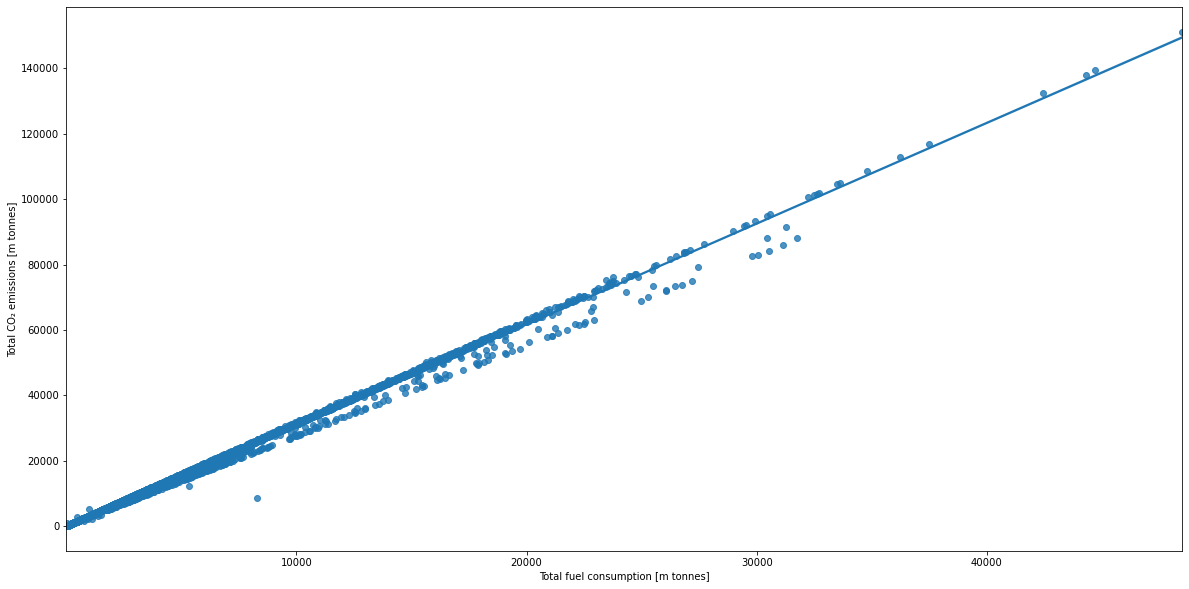

In [24]:
# Relationship between fuel consumption and CO2 emissions
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
sb.regplot(x='Total fuel consumption [m tonnes]', y='Total CO₂ emissions [m tonnes]', data=data20, scatter=True)

In [25]:
stats.pearsonr(data20["Total fuel consumption [m tonnes]"],data20["Total CO₂ emissions [m tonnes]"])

(0.9988386923610514, 0.0)

In [26]:
#Ports of registry
data20['Port of Registry'].value_counts(ascending=False)

Monrovia      1161
Majuro        1143
Valletta       677
Panama         601
PANAMA         596
              ... 
Venice           1
Ringkøbing       1
Nakskov          1
Sakskobing       1
Shenzhen         1
Name: Port of Registry, Length: 491, dtype: int64

In [27]:
#Main verifiers
data20['Verifier Name'].value_counts(ascending=False)

DNV GL                                                                                                  2798
AMERICAN BUREAU OF SHIPPING HELLENIC SINGLE MEMBER LIMITED LIABILITY COMPANY (ABS HELLENIC S.M. LTD)    1972
HELLENIC LLOYD'S S.A.                                                                                   1231
Nippon Kaiji Kyokai                                                                                     1159
RINA Services Spa                                                                                        859
VERIFAVIA SARL                                                                                           838
Bureau Veritas Certification France                                                                      813
CHINA CLASSIFICATION SOCIETY                                                                             299
Korean Register                                                                                          295
EMICERT            

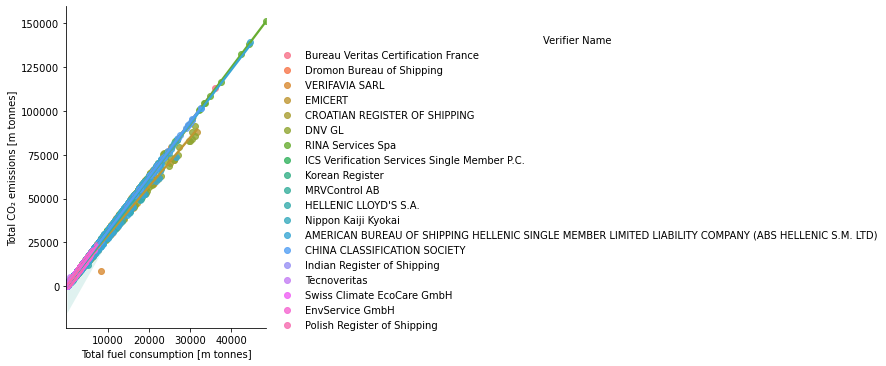

In [28]:
sb.lmplot(x='Total fuel consumption [m tonnes]', y='Total CO₂ emissions [m tonnes]', data=data20,hue ="Verifier Name")

In [29]:
#Methods of recording GHG emissions
data20['A'].value_counts()

Yes    5107
Name: A, dtype: int64

In [30]:
data20['B'].value_counts()

Yes    3518
Name: B, dtype: int64

In [31]:
data20['C'].value_counts()

Yes    3690
Name: C, dtype: int64

In [32]:
data20['D'].value_counts()

Yes    1
Name: D, dtype: int64

<AxesSubplot:xlabel='Method', ylabel='Count'>

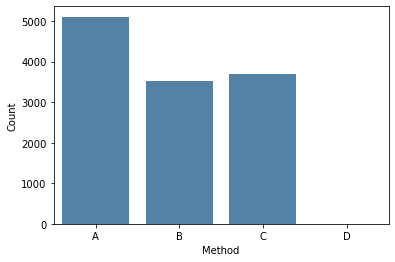

In [33]:
CO2methods= pd.DataFrame({'Method':["A","B","C","D"],
                   'Count':[5107,3518,3690,1]})
sb.barplot(x="Method", y="Count", data=CO2methods,color='steelblue')

In [34]:
data20['MethodA'] = np.where(data20['A']=='Yes', 'A',"")
data20["MethodB"]=np.where(data20['B']=='Yes', 'B',"")
data20["MethodC"]=np.where(data20['C']=='Yes', 'C',"")
data20["MethodD"]=np.where(data20['D']=='Yes', 'D',"")
data20= data20.assign(Method = data20.MethodA.astype(str)+data20.MethodB.astype(str) +data20.MethodC.astype(str) + data20.MethodD.astype(str))


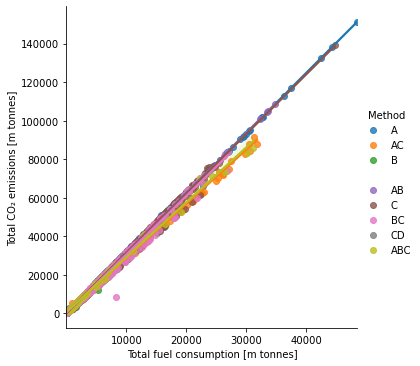

In [35]:

sb.lmplot(x='Total fuel consumption [m tonnes]', y='Total CO₂ emissions [m tonnes]', data=data20,hue ="Method")

In [36]:
# Total GHG emissions produced by shipping
data["Total CO₂ emissions [m tonnes]"].sum()

414320895.09

In [37]:
data18["Total CO₂ emissions [m tonnes]"].sum()

145061487.29000002

In [38]:
data19["Total CO₂ emissions [m tonnes]"].sum()

146750923.18

In [39]:
data20["Total CO₂ emissions [m tonnes]"].sum()

122460243.88

<AxesSubplot:xlabel='Year', ylabel='Total CO₂ emissions [m tonnes]'>

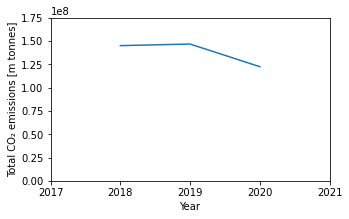

In [40]:
CO2emissions= pd.DataFrame({'Year':[2018,2019,2020],
                   'Total CO₂ emissions [m tonnes]':[145061487,146750923,122460244]})
                           


dims = (5, 3)
fig, ax = plt.subplots(figsize=dims)
plt.ylim(0,175000000 )
plt.xlim(2017,2021 )
tickpos = [2017,2018,2019,2020,2021]
plt.xticks(tickpos,tickpos)
sb.lineplot(x='Year', y='Total CO₂ emissions [m tonnes]', data=CO2emissions)

In [41]:
#CO2 emissions per ship
CO2emissions["Number of ships"]=[11593,12017,10955]
CO2emissions["Mean annual CO₂ emissions [m tonnes] per ship"]=CO2emissions["Total CO₂ emissions [m tonnes]"]/CO2emissions["Number of ships"]
CO2emissions=CO2emissions.round({"Total CO₂ emissions [m tonnes]":0,"Mean annual CO₂ emissions [m tonnes] per ship":0})
CO2emissions

,Year,Total CO₂ emissions [m tonnes],Number of ships,Mean annual CO₂ emissions [m tonnes] per ship
0,2018,145061487,11593,12513.0
1,2019,146750923,12017,12212.0
2,2020,122460244,10955,11178.0


In [42]:
# CO2 emissions by journey type in the EU
data20["CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]"].sum()

36133064.89

In [43]:
data20["CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]"].sum()

37957803.32

In [44]:
data20["CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]"].sum()

41079038.96

In [45]:
data20["CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]"].sum()

7867855.26

<AxesSubplot:xlabel='Journey Type', ylabel='CO₂ emissions [m tonnes]'>

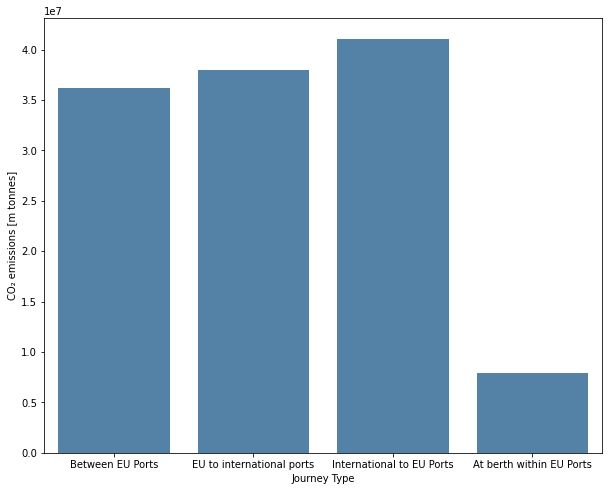

In [46]:
JourneyTypes= pd.DataFrame({'Journey Type':["Between EU Ports","EU to international ports","International to EU Ports","At berth within EU Ports"],
                   'CO₂ emissions [m tonnes]':[36133065,37957803,41079039,7867855]})
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
sb.barplot(x="Journey Type", y="CO₂ emissions [m tonnes]", data=JourneyTypes,color='steelblue')

In [47]:
JourneyTypes["CO₂ emissions [m tonnes]"].sum()
JourneyTypes["CO₂ Emissions (%)"]=(JourneyTypes["CO₂ emissions [m tonnes]"]/123059137)*100
JourneyTypes

,Journey Type,CO₂ emissions [m tonnes],CO₂ Emissions (%)
0,Between EU Ports,36133065,29.362359
1,EU to international ports,37957803,30.845172
2,International to EU Ports,41079039,33.381543
3,At berth within EU Ports,7867855,6.393556


<AxesSubplot:xlabel='Journey Type', ylabel='CO₂ Emissions (%)'>

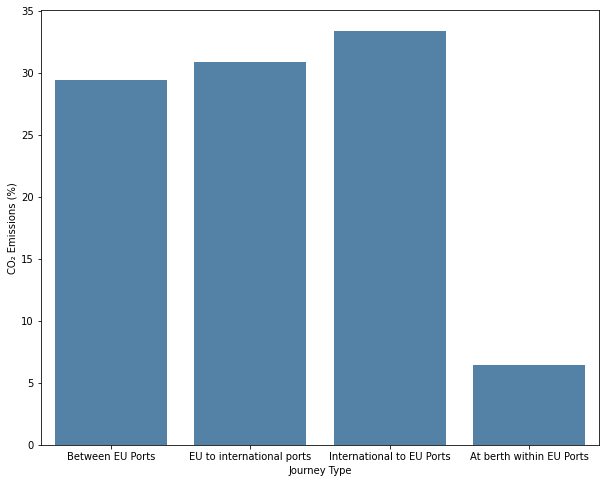

In [48]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
sb.barplot(x="Journey Type", y="CO₂ Emissions (%)", data=JourneyTypes,color='steelblue')

In [49]:
#Average CO2 released for each type of journey
BEUports = data20[data20["CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]"] >0]
BEUports["CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]"].mean()

4307.195719394457

In [50]:
FEUports = data20[data20["CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]"] >0]
FEUports["CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]"].mean()

3819.076699869191

In [51]:
TEUports = data20[data20["CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]"] >0]
TEUports["CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]"].mean()

4130.20701387494

In [52]:
AEUports = data20[data20["CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]"] >0]
AEUports["CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]"].mean()

728.842543770262

In [53]:
#Predictions of ETS scheme
ETSTable=DF_obj= pd.DataFrame({'% of international emissions covered':[100,50,25,0],
                   'Amount of CO₂ covered by ETS scheme[million metric tonnes] ':[122.5,83.4 ,63.8,44],
                   'Cost to be paid if 25 euros per tonne [billion euros]':[3.05, 2.07,1.6,1.1],
                    'Cost to be paid if 50 euros per tonne':[6.1, 4.14, 3.2,2.2]})
ETSTable

,% of international emissions covered,Amount of CO₂ covered by ETS scheme[million metric tonnes],Cost to be paid if 25 euros per tonne [billion euros],Cost to be paid if 50 euros per tonne
0,100,122.5,3.05,6.10
1,50,83.4,2.07,4.14
2,25,63.8,1.60,3.20
3,0,44.0,1.10,2.20


In [54]:
#CO2 emissions by work done
data20["CO₂ emissions assigned to Passenger transport [m tonnes]"].sum()

4853342.57

In [55]:
data20["CO₂ emissions assigned to Freight transport [m tonnes]"].sum()

6443436.57

In [56]:
data20["CO₂ emissions assigned to On laden [m tonnes]"].sum()

11820819.93

In [57]:
# Calculating approximate distance travelled by ships

data20["Distance travelled(n miles)"]=(data20["Total fuel consumption [m tonnes]"]/data20["Annual average Fuel consumption per distance [kg / n mile]"])*1000
data20["Distance travelled(n miles)"].describe()

count     10955.000000
mean      27713.784641
std       21146.499222
min          20.330000
25%       11667.046083
50%       21927.611758
75%       38221.077678
max      155521.885522
Name: Distance travelled(n miles), dtype: float64

<AxesSubplot:xlabel='Distance travelled(n miles)', ylabel='Total CO₂ emissions [m tonnes]'>

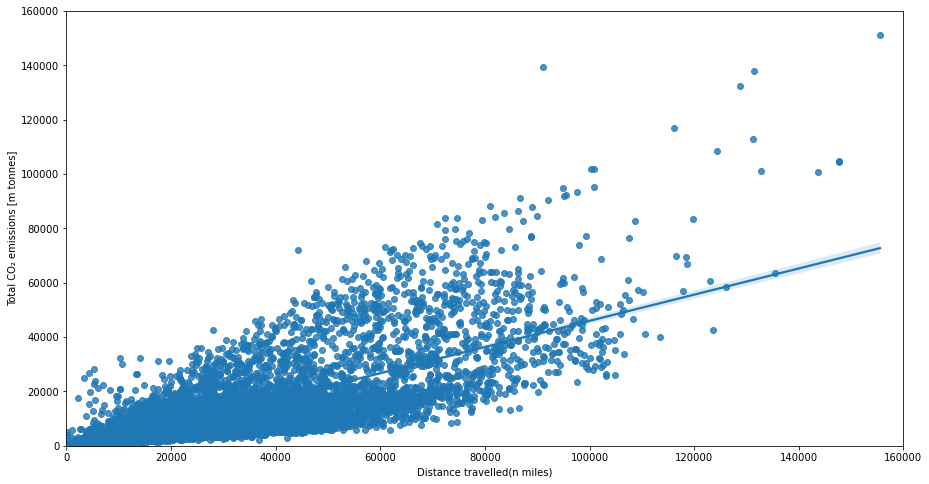

In [58]:
dims = (15, 8)
fig, ax = plt.subplots(figsize=dims)
plt.ylim(0,160000 )
plt.xlim(0,160000 )

sb.regplot(x="Distance travelled(n miles)", y='Total CO₂ emissions [m tonnes]', data=data20,scatter=True)

In [59]:
stats.pearsonr(data20["Distance travelled(n miles)"], data20["Total CO₂ emissions [m tonnes]"])

(0.7676107609462521, 0.0)

In [60]:
ShipTypeDistance=data20.groupby('Ship type')['Distance travelled(n miles)'].mean()
ShipTypeDistance=pd.DataFrame(ShipTypeDistance)
ShipTypeDistance=ShipTypeDistance.reset_index()
ShipTypeDistance=ShipTypeDistance.sort_values(by='Distance travelled(n miles)', ascending=False)
ShipTypeDistance

,Ship type,Distance travelled(n miles)
13,Ro-ro ship,61372.093492
12,Ro-pax ship,59702.399762
4,Container/ro-ro cargo ship,47155.458014
3,Container ship,39850.099502
11,Refrigerated cargo carrier,38452.788917
7,LNG carrier,35964.020686
14,Vehicle carrier,30091.315927
6,General cargo ship,27384.570252
5,Gas carrier,26773.239152
1,Chemical tanker,26584.876537


In [62]:
data20['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = pd.to_numeric(data20['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'], errors='coerce')
data20=data20.dropna(subset=["Annual average CO₂ emissions per distance [kg CO₂ / n mile]"])

In [63]:
# Ship emissions per nautical mile
ShipTypeMeanCO2emissions2=data20.groupby('Ship type')['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].mean()
ShipTypeMeanCO2emissions2=pd.DataFrame(ShipTypeMeanCO2emissions2)
ShipTypeMeanCO2emissions2=ShipTypeMeanCO2emissions2.reset_index()
ShipTypeMeanCO2emissions2=ShipTypeMeanCO2emissions2.sort_values(by='Annual average CO₂ emissions per distance [kg CO₂ / n mile]', ascending=False)

ShipTypeMeanCO2emissions2


,Ship type,Annual average CO₂ emissions per distance [kg CO₂ / n mile]
10,Passenger ship,1492.632885
7,LNG carrier,859.014246
3,Container ship,589.765930
12,Ro-pax ship,523.545833
8,Oil tanker,449.690514
0,Bulk carrier,403.350595
4,Container/ro-ro cargo ship,389.443286
13,Ro-ro ship,343.439185
2,Combination carrier,336.502000
14,Vehicle carrier,320.463326


<AxesSubplot:xlabel='Annual average CO₂ emissions per distance [kg CO₂ / n mile]', ylabel='Ship type'>

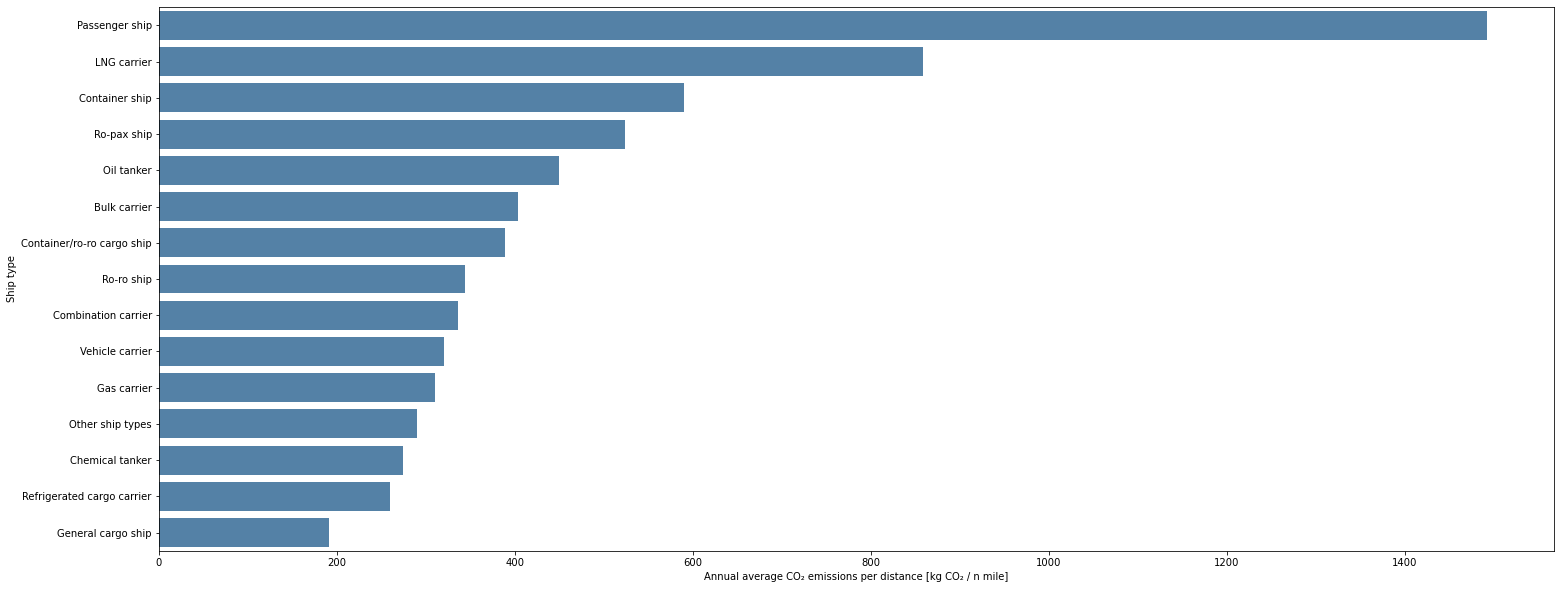

In [64]:
dims = (25, 10)
fig, ax = plt.subplots(figsize=dims)
sb.barplot(y="Ship type", x="Annual average CO₂ emissions per distance [kg CO₂ / n mile]", data=ShipTypeMeanCO2emissions2,color='steelblue')

In [65]:
#Calculating approximate average speed of ships
data20["Average speed (n miles/hour)"]=data20["Distance travelled(n miles)"]/data20["Annual Total time spent at sea [hours]"]
data20["Average speed (n miles/hour)"].describe()

count    10955.000000
mean        11.860801
std          3.202817
min          0.010439
25%         10.372058
50%         11.561224
75%         12.996241
max        181.994361
Name: Average speed (n miles/hour), dtype: float64

In [66]:
data20=data20[data20["Average speed (n miles/hour)"]<50 ]
data20["Average speed (n miles/hour)"].describe()

count    10952.000000
mean        11.836839
std          2.688132
min          0.010439
25%         10.371359
50%         11.560634
75%         12.995582
max         35.185151
Name: Average speed (n miles/hour), dtype: float64

<AxesSubplot:xlabel='Average speed (n miles/hour)', ylabel='Total CO₂ emissions [m tonnes]'>

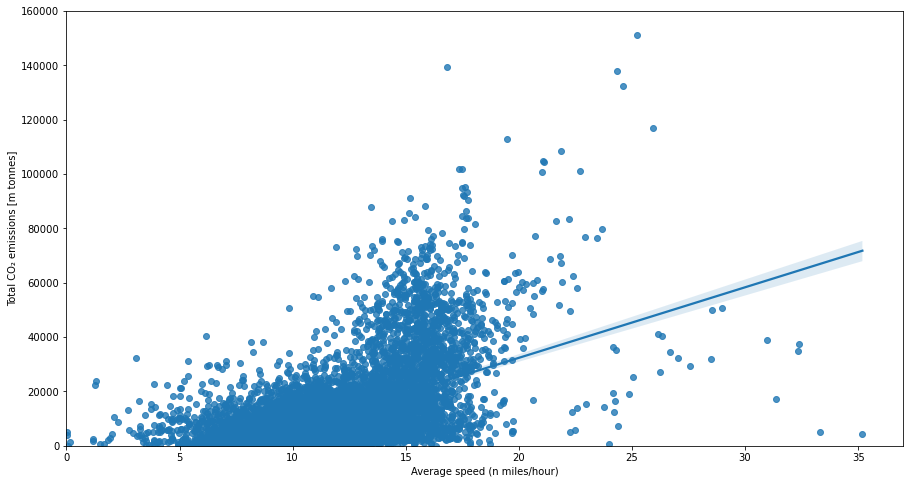

In [67]:
# Investigating effect of speed on CO2 emissions
dims = (15, 8)
fig, ax = plt.subplots(figsize=dims)
plt.ylim(0,160000 )
plt.xlim(0,37 )

sb.regplot(x="Average speed (n miles/hour)", y='Total CO₂ emissions [m tonnes]', data=data20,scatter=True)

In [68]:
stats.pearsonr(data20["Average speed (n miles/hour)"], data20["Total CO₂ emissions [m tonnes]"])

(0.5258615212172888, 0.0)

In [83]:
ShipTypeMeanSpeed=data20.groupby('Ship type')['Average speed (n miles/hour)'].mean()
ShipTypeMeanSpeed=ShipTypeMeanSpeed.reset_index()
ShipTypeMeanSpeed=ShipTypeMeanSpeed.sort_values(by='Average speed (n miles/hour)', ascending=False)
ShipTypeMeanSpeed

,Ship type,Average speed (n miles/hour)
12,Ro-pax ship,16.535291
4,Container/ro-ro cargo ship,14.968256
11,Refrigerated cargo carrier,14.600091
7,LNG carrier,14.415163
13,Ro-ro ship,14.167693
3,Container ship,13.764410
14,Vehicle carrier,13.371921
5,Gas carrier,12.517843
9,Other ship types,11.636248
1,Chemical tanker,11.066981


<AxesSubplot:xlabel='Average speed (n miles/hour)', ylabel='Ship type'>

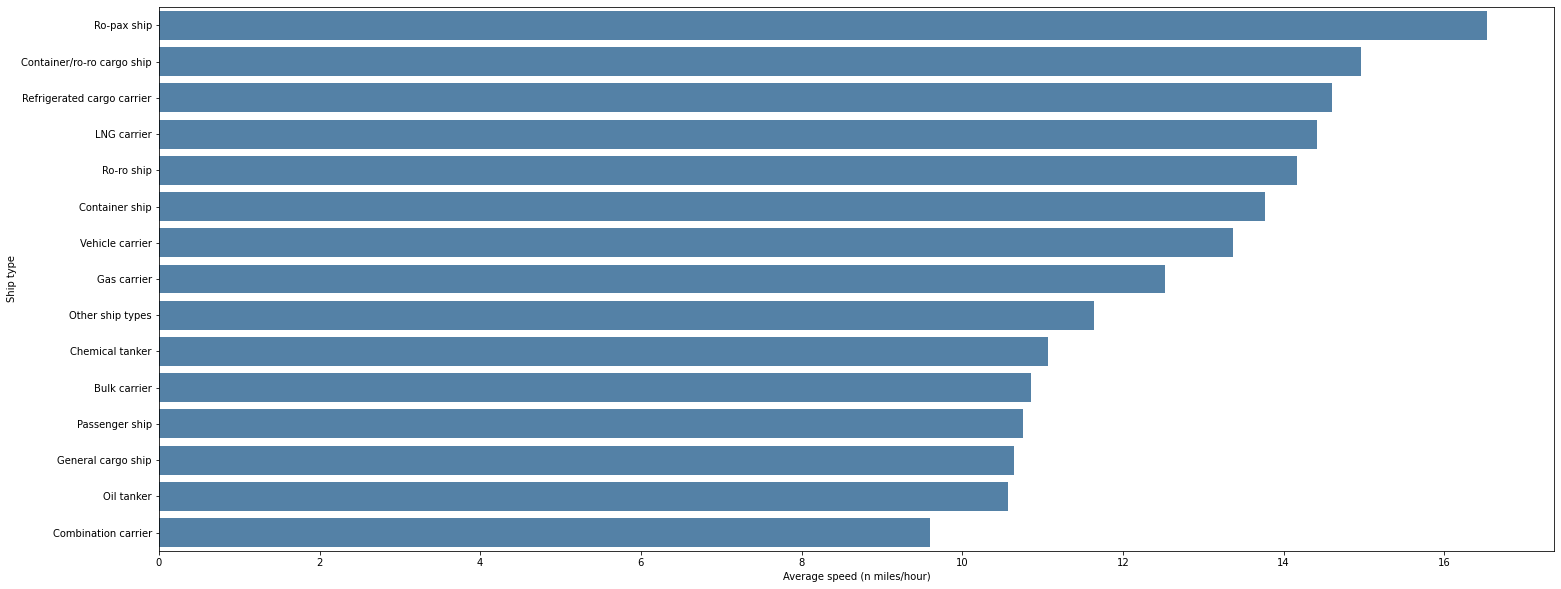

In [84]:
dims = (25, 10)
fig, ax = plt.subplots(figsize=dims)
sb.barplot(y="Ship type", x="Average speed (n miles/hour)", data=ShipTypeMeanSpeed,color='steelblue')

In [70]:
#Efficiency of ships
data20["Technical efficiency (gCO₂/t·nm)"]=data20["Technical efficiency"].str.replace(r"\D+",'')
data20['Technical efficiency (gCO₂/t·nm)'] = pd.to_numeric(data20['Technical efficiency (gCO₂/t·nm)'], errors='coerce')
data20=data20.dropna(subset=["Technical efficiency (gCO₂/t·nm)"])
data20['Technical efficiency (gCO₂/t·nm)']=data20['Technical efficiency (gCO₂/t·nm)']/100
data20['Technical efficiency (gCO₂/t·nm)'].describe()

count    10828.000000
mean         8.945186
std         11.683622
min          0.000000
25%          3.530000
50%          5.960000
75%         12.360000
max        599.760000
Name: Technical efficiency (gCO₂/t·nm), dtype: float64

<AxesSubplot:xlabel='Technical efficiency (gCO₂/t·nm)', ylabel='Count'>

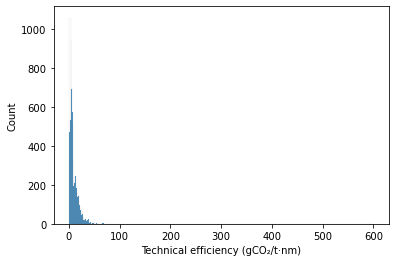

In [71]:
sb.histplot(data20, x="Technical efficiency (gCO₂/t·nm)")

In [72]:
data20=data20[data20['Technical efficiency (gCO₂/t·nm)']<100]
data20['Technical efficiency (gCO₂/t·nm)'].describe()

count    10820.000000
mean         8.756901
std          8.410655
min          0.000000
25%          3.530000
50%          5.960000
75%         12.350000
max         91.290000
Name: Technical efficiency (gCO₂/t·nm), dtype: float64

In [73]:
ShipTechEfficiency=pd.DataFrame(data20.groupby("Ship type")["Technical efficiency (gCO₂/t·nm)"].mean())
ShipTechEfficiency=ShipTechEfficiency.reset_index()
ShipTechEfficiency=ShipTechEfficiency.sort_values(by='Technical efficiency (gCO₂/t·nm)', ascending=False)
ShipTechEfficiency

,Ship type,Technical efficiency (gCO₂/t·nm)
12,Ro-pax ship,19.791914
11,Refrigerated cargo carrier,17.070423
14,Vehicle carrier,16.246628
13,Ro-ro ship,14.660215
3,Container ship,14.349783
10,Passenger ship,14.225783
9,Other ship types,13.388675
6,General cargo ship,10.628567
5,Gas carrier,9.783483
4,Container/ro-ro cargo ship,8.961000


In [74]:
data20['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = pd.to_numeric(data20['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'], errors='coerce')
data20=data20.dropna(subset=["Annual average CO₂ emissions per distance [kg CO₂ / n mile]"])
data20=data20[data20['Annual average CO₂ emissions per distance [kg CO₂ / n mile]']<10000]

<AxesSubplot:xlabel='Technical efficiency (gCO₂/t·nm)', ylabel='Annual average CO₂ emissions per distance [kg CO₂ / n mile]'>

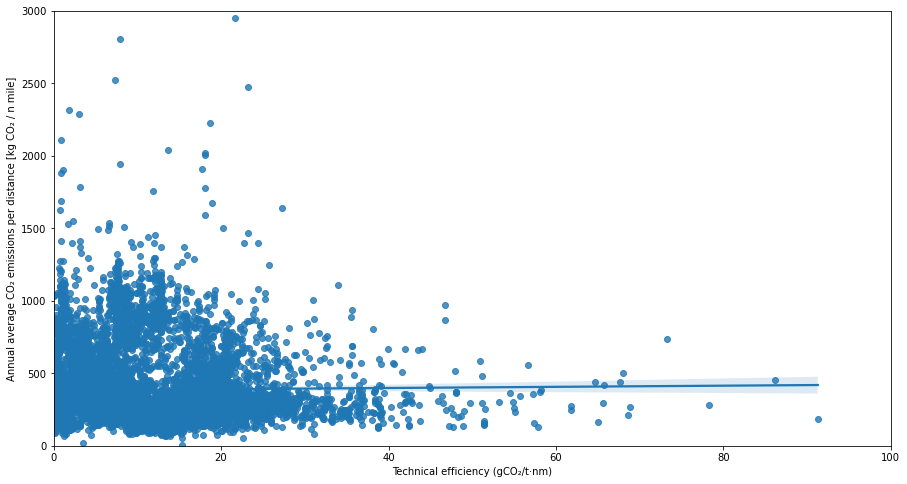

In [75]:
#Effect of efficiency on CO2 emissions
dims = (15, 8)
fig, ax = plt.subplots(figsize=dims)
plt.ylim(0,3000)
plt.xlim(0,100)

sb.regplot(x="Technical efficiency (gCO₂/t·nm)", y='Annual average CO₂ emissions per distance [kg CO₂ / n mile]', data=data20,scatter=True)

In [76]:
stats.pearsonr(data20["Technical efficiency (gCO₂/t·nm)"], data20["Annual average CO₂ emissions per distance [kg CO₂ / n mile]"])

(0.01154186310193263, 0.22999722882267482)

<AxesSubplot:xlabel='Technical efficiency (gCO₂/t·nm)', ylabel='Total CO₂ emissions [m tonnes]'>

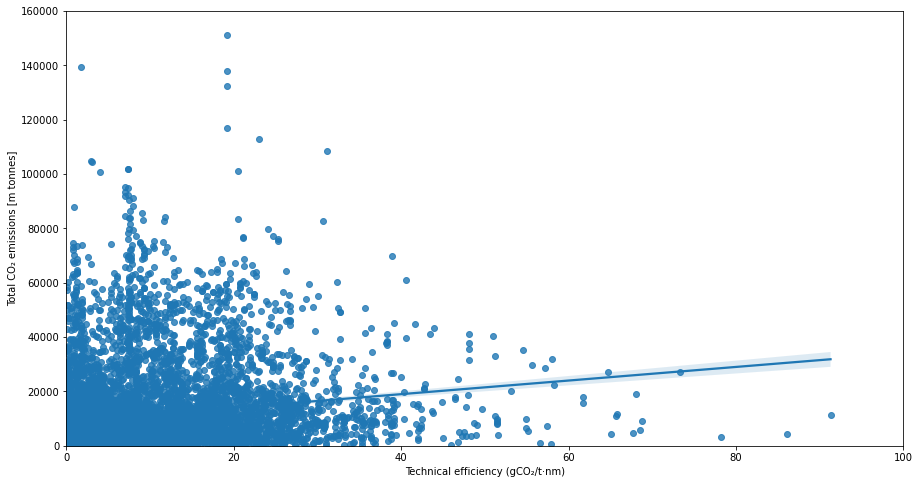

In [77]:
#Effect of efficiency on CO2 emissions
dims = (15, 8)
fig, ax = plt.subplots(figsize=dims)
plt.ylim(0,160000)
plt.xlim(0,100)

sb.regplot(x="Technical efficiency (gCO₂/t·nm)", y='Total CO₂ emissions [m tonnes]', data=data20,scatter=True)

In [78]:
stats.pearsonr(data20["Technical efficiency (gCO₂/t·nm)"], data20["Total CO₂ emissions [m tonnes]"])

(0.15857522493452225, 7.380927651150075e-62)

In [80]:
#Highest Co2 emitters
HighEmitters=data20[data20["Total CO₂ emissions [m tonnes]"]>120000]
HighEmitters

,Name,Ship type,Reporting Period,Technical efficiency,Port of Registry,Home Port,Ice Class,DoC issue date,DoC expiry date,Verifier Number,...,Additional information to facilitate the understanding of the reported average operational energy efficiency indicators,Average density of the cargo transported [m tonnes / m³],MethodA,MethodB,MethodC,MethodD,Method,Distance travelled(n miles),Average speed (n miles/hour),Technical efficiency (gCO₂/t·nm)
IMO Number,,,,,,,,,,,,,,,,,,,,,
9289972,MP THE BRADY,Container ship,2020,EEDI (16.8 gCO₂/t·nm),Monrovia,NaN,NaN,12/05/2021,30/06/2022,1083,...,NaN,NaN,,,C,,C,91163.017329,16.836208,1.68
9351476,CRUISE ROMA,Ro-pax ship,2020,EIV (19.21 gCO₂/t·nm),Palermo,NaN,NaN,30/04/2021,30/06/2022,NaN,...,NaN,NaN,A,,,,A,128791.895417,24.621553,19.21
9351488,CRUISE BARCELONA,Ro-pax ship,2020,EIV (19.21 gCO₂/t·nm),Palermo,NaN,NaN,30/04/2021,30/06/2022,NaN,...,NaN,NaN,A,,,,A,131409.290460,24.353544,19.21
9351505,CRUISE OLYMPIA,Ro-pax ship,2020,EIV (19.21 gCO₂/t·nm),Palermo,NaN,NaN,30/04/2021,30/06/2022,NaN,...,NaN,NaN,A,,,,A,155521.885522,25.223474,19.21
